In [0]:
!git clone https://github.com/Mjdhsn49/Classification-Object-detection-API.git

Before starting clone the repository to access all the data and code

# Classification task on cats and dogs 
I recommend using google colab to run this notebook by clicking here
[Cats-Dogs_Image_Classification_CNN](https://colab.research.google.com/github/Mjdhsn49/Classification-Object-detection-API/blob/master/notebooks/Image_Classifier_CNN.ipynb)

1) First let's try with simple CNN model

2) Secondly we will use Pre-trained VGG16 Model

3) Later we try some Data Augmentation and evaluate 

In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam, RMSprop
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Assigning paths
train_path = 'Dataset/training_set/'
valid_path = 'Dataset/validation_set/'
test_path = 'Dataset/test/'

In [4]:
#Use this paths if running this notebook in collab
#train_path = 'Classification-Object-detection-API/notebooks/Dataset/training_set/'
#valid_path = 'Classification-Object-detection-API/notebooks/Dataset/validation_set/'
#test_path = 'Classification-Object-detection-API/notebooks/Dataset/test/

In [3]:
#Generating batches using ImageDataGenerator
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['cat','dog'], batch_size = 100)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes = ['cat','dog'],batch_size =50)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 4002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [0]:
# plotting images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation = None if interp else 'none')
            

In [0]:
imgs,labels = next(train_batches)

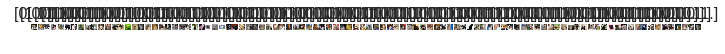

In [0]:
plots(imgs,titles=labels)

# Build and train CNN

In [0]:
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),Flatten(),Dense(2,activation='softmax')])

In [0]:

model.compile(RMSprop(lr=0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit_generator(train_batches,steps_per_epoch=40,validation_data=valid_batches,validation_steps=40,epochs=5,verbose=1)

Epoch 1/5
40/40 [==============================] - 22s 549ms/step - loss: 7.8277 - acc: 0.5127 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
40/40 [==============================] - 22s 541ms/step - loss: 8.2275 - acc: 0.4895 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
40/40 [==============================] - 21s 537ms/step - loss: 8.1357 - acc: 0.4952 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
40/40 [==============================] - 22s 540ms/step - loss: 7.9784 - acc: 0.5050 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
40/40 [==============================] - 22s 540ms/step - loss: 8.0913 - acc: 0.4980 - val_loss: 8.0590 - val_acc: 0.5000


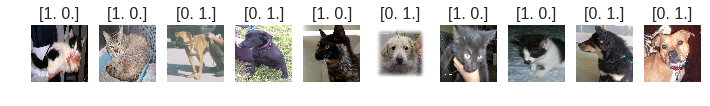

In [0]:
#we have not got a good results here we will do some fine-tuning of some parameters to improve the results
#Before that lets do the prediction on our test data and see the confusion matrix

test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [0]:
test_labels = test_labels[:,0]
test_labels


array([1., 1., 0., 0., 1., 0., 1., 1., 0., 0.], dtype=float32)

In [0]:
Prediction = model.predict_generator(test_batches,steps=1,verbose=0)

In [0]:
Prediction

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
cm = confusion_matrix(test_labels,Prediction[:,0])

In [0]:
#Simple program to plot confusion matrix (you can find this in scikit learn documentation)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[5 0]
 [5 0]]


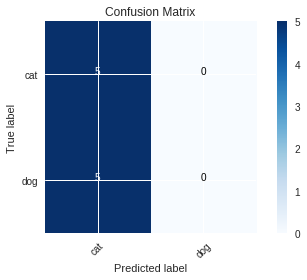

In [0]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix')

####As we can see from confusion matrix i.e, only 50% accuracy we got
####we will use now pre-trained  vgg16 model and evaluate 

#What is a Pre-trained Model?
A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Learned features are often transferable to different data. For example, a model trained on a large dataset of bird images will contain learned features like edges or horizontal lines that you would be transferable your dataset.

#Why use a Pre-trained Model?
Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from it.


# Building Fine-Tuned VGG16

VGG16 is a deep convolutional network for object recognition developed and trained by Oxford's renowned Visual Geometry Group (VGG), which achieved very good performance on the ImageNet dataset.

In [0]:
from keras.applications import vgg16
from keras.models import Model
import keras
import numpy as np
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
vgg16_model = keras.applications.vgg16.VGG16()


In [0]:
#vgg16_model.summary()
type(vgg16_model)

keras.engine.training.Model

In [0]:
#changing it into sequential 
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
type(model)

keras.models.Sequential

In [0]:
model.layers.pop()# this is to remove the last layer i.e, dense 1000 class layer and later we add dense 2 class for our model

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

As we are using the pre-trained model namely VGG16 which was already trained on whole imagenet dataset. Now we dont want to update our weights  of this model as it has already been trained very well therefore we freeze the layers.

In [0]:
for layer in model.layers:
    #This is used to freeze this layer means it will not learn any feature
    layer.trainable = False

In [0]:
model.add(Dense(2, activation = 'softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Training the Fine-tuned VGG16

In [0]:
model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [0]:
model.fit_generator(train_batches,steps_per_epoch=40,validation_data=valid_batches,validation_steps=40,epochs=5,verbose=1)


Epoch 1/5
40/40 [==============================] - 58s 1s/step - loss: 0.6255 - acc: 0.9357 - val_loss: 0.5990 - val_acc: 0.9520
Epoch 2/5
40/40 [==============================] - 57s 1s/step - loss: 0.5731 - acc: 0.9747 - val_loss: 0.5551 - val_acc: 0.9560
Epoch 3/5
40/40 [==============================] - 57s 1s/step - loss: 0.5295 - acc: 0.9775 - val_loss: 0.5135 - val_acc: 0.9685
Epoch 4/5
40/40 [==============================] - 57s 1s/step - loss: 0.4905 - acc: 0.9830 - val_loss: 0.4815 - val_acc: 0.9650
Epoch 5/5
40/40 [==============================] - 57s 1s/step - loss: 0.4576 - acc: 0.9865 - val_loss: 0.4577 - val_acc: 0.9590


In [0]:
#model.save('VGG16_cats_and_dogs.h5')

In [0]:
#Prediction
prediction = model.predict_generator(test_batches,steps=1,verbose=0)

In [0]:
#rounding off the predicted values
np.round(prediction)

In [0]:
#Plotting the confusion matrix
cm = confusion_matrix(test_labels,np.round(prediction[:,0]))

Confusion matrix, without normalization
[[5 0]
 [0 5]]


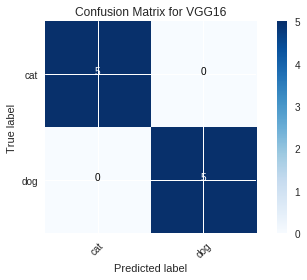

In [0]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix for VGG16')

####As you can see we have got  around 95%  validation accuracy using pre-trained vgg16 model using 4000 training images.Further we try some Data Augmentation.
Data Augmentation is a process to generate more training data i.e, by rotating,zooming, shift etc 

#Data Augmentation

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# CNN
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
#Augmenting the data to generate more training set
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
#creating training and validation sets
training_set = train_datagen.flow_from_directory('Image_Classification_CNN/dogs_and_cats/training_set',
 target_size = (64, 64),
 batch_size = 32,
 classes = ['cat','dog'])
validation_set = valid_datagen.flow_from_directory('Image_Classification_CNN/dogs_and_cats/validation_set',
 target_size = (64, 64),
 batch_size = 32,
 classes = ['cat','dog'])

Found 4002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
classifier.fit_generator(training_set,
 steps_per_epoch = 4002/32,
 epochs = 20,
 validation_data = validation_set,
 validation_steps = 2000/32)

Epoch 1/20
126/125 [==============================] - 23s 183ms/step - loss: 0.6912 - acc: 0.5468 - val_loss: 0.6734 - val_acc: 0.5555
Epoch 2/20
126/125 [==============================] - 22s 171ms/step - loss: 0.6534 - acc: 0.6191 - val_loss: 0.6553 - val_acc: 0.6220
Epoch 3/20
126/125 [==============================] - 21s 168ms/step - loss: 0.6271 - acc: 0.6535 - val_loss: 0.5987 - val_acc: 0.6805
Epoch 4/20
126/125 [==============================] - 21s 170ms/step - loss: 0.5801 - acc: 0.6927 - val_loss: 0.7387 - val_acc: 0.6220
Epoch 5/20
126/125 [==============================] - 21s 168ms/step - loss: 0.5592 - acc: 0.7138 - val_loss: 0.5506 - val_acc: 0.7115
Epoch 6/20
126/125 [==============================] - 21s 168ms/step - loss: 0.5384 - acc: 0.7304 - val_loss: 0.5623 - val_acc: 0.7130
Epoch 7/20
126/125 [==============================] - 21s 169ms/step - loss: 0.5191 - acc: 0.7426 - val_loss: 0.5393 - val_acc: 0.7220
Epoch 8/20
126/125 [==============================] - 2

We have got around 75 percent accuracy with a simple CNN using Data Augmentation

Using the same CNN model let's train with our normal data where no data augmentation was done and later compare both the results

In [0]:
train_batches1 = ImageDataGenerator().flow_from_directory(train_path, target_size=(64,64),classes=['cat','dog'], batch_size = 32)
valid_batches1 = ImageDataGenerator().flow_from_directory(valid_path,target_size=(64,64),classes = ['cat','dog'],batch_size =32)


Found 4002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
classifier.fit_generator(train_batches1,
 steps_per_epoch = 4002/32,
 epochs = 20,
 validation_data = valid_batches1,
 validation_steps = 2000/32)

Epoch 1/20
126/125 [==============================] - 18s 139ms/step - loss: 7.9261 - acc: 0.5082 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/20
126/125 [==============================] - 17s 132ms/step - loss: 8.1527 - acc: 0.4940 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/20
126/125 [==============================] - 17s 133ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/20
126/125 [==============================] - 17s 133ms/step - loss: 8.1185 - acc: 0.4963 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/20
126/125 [==============================] - 17s 133ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/20
126/125 [==============================] - 17s 132ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/20
126/125 [==============================] - 17s 132ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/20
126/125 [==============================] - 1

####As you see we got just 50% accuracy here where as for above using augmented data we got 75% 